In [56]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time

from tensorflow import keras

# Data Preparation
## Load Dataset

In [45]:
(train, test), info = tfds.load("mnist", split=["train", "test"], as_supervised=True,
                                shuffle_files=True, with_info=True)

In [46]:
info.features['image'].shape

(28, 28, 1)

## Batch Datset

In [47]:
input_shape = info.features['image'].shape
num_classes = 10

In [48]:
batch_size = 128
train = train.batch(batch_size).prefetch(1)
test = test.batch(batch_size).prefetch(1)
train

<PrefetchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>

# Model

In [49]:
model = keras.models.Sequential([
    keras.layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=input_shape),
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=input_shape),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(num_classes, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 32)         

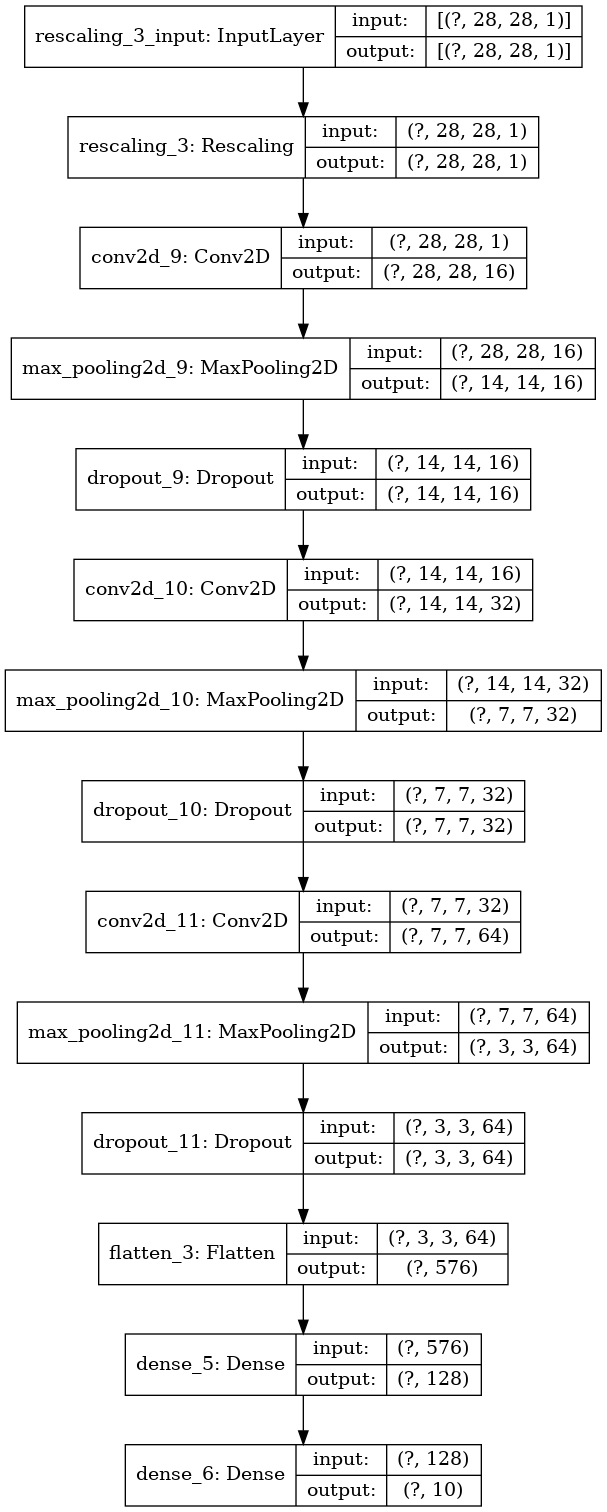

In [50]:
keras.utils.plot_model(model, show_shapes=True)

In [51]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["acc"])

In [58]:
root_logdir = os.path.join(os.curdir, "logs")
logdir = os.path.join(root_logdir, f"run_{time.time()}")
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.EarlyStopping(patience=3),
    keras.callbacks.ModelCheckpoint("mnist_model.h5", save_best_only=True)
]
history = model.fit(train, epochs=20, validation_data=test, callbacks=callbacks)

Epoch 1/20
  1/469 [..............................] - ETA: 0s - loss: 2.3263 - acc: 0.1094WARNING:tensorflow:From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


  2/469 [..............................] - ETA: 1:05 - loss: 2.3144 - acc: 0.1094WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0842s vs `on_train_batch_end` time: 0.1960s). Check your callbacks.


469/469 [==============================] - 44s 94ms/step - loss: 0.6350 - acc: 0.7871 - val_loss: 0.1399 - val_acc: 0.9547
Epoch 2/20
469/469 [==============================] - 37s 79ms/step - loss: 0.2267 - acc: 0.9278 - val_loss: 0.0844 - val_acc: 0.9711
Epoch 3/20
469/469 [==============================] - 37s 80ms/step - loss: 0.1623 - acc: 0.9491 - val_loss: 0.0570 - val_acc: 0.9818
Epoch 4/20
469/469 [==============================] - 37s 79ms/step - loss: 0.1343 - acc: 0.9576 - val_loss: 0.0495 - val_acc: 0.9834
Epoch 5/20
469/469 [==============================] - 36s 76ms/step - loss: 0.1167 - acc: 0.9639 - val_loss: 0.0444 - val_acc: 0.9852
Epoch 6/20
469/469 [==============================] - 37s 79ms/step - loss: 0.1083 - acc: 0.9664 - val_loss: 0.0413 - val_acc: 0.9864
Epoch 7/20
469/469 [==============================] - 41s 88ms/step - loss: 0.0997 - acc: 0.9698 - val_loss: 0.0352 - val_acc: 0.9883
Epoch 8/20
469/469 [==============================] - 37s 80ms/step - los

In [59]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

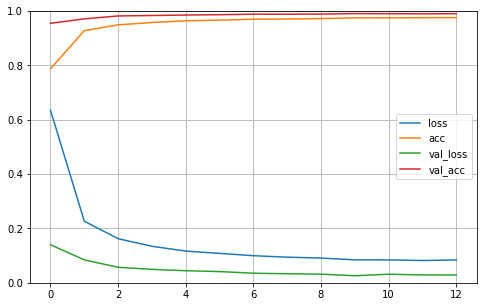

In [60]:
plot_learning_curves(history)